# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Khalid Wira Yuda]
- **Email:** [khalidwy0707@gmail.com]
- **ID Dicoding:** [khalideai]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara hujan (RAIN), suhu udara (TEMP) dan kelembapan udara (DEWP) terhadap konsentrasi polutan PM2.5 dan PM10?
- Bagaimana tren polusi udara (PM2.5 dan PM10) berkembang dari tahun ke tahun di wilayah ini?
- Apakah terdapat pola musiman dalam konsentrasi polutan udara?
- Bagaimana pola polusi udara pada berbagai jam dalam sehari?



## Import Semua Packages/Library yang Digunakan

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Melakukan import library yang diperlukan dalam melakukan analisis data.

## Data Wrangling

### Gathering Data

In [51]:
file_path = "./data/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
df = pd.read_csv(file_path)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


Melakukan import data csv yang akan dianalisis

### Assessing Data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Menampilkan ringkasan struktur dataframe.

In [53]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Insight :

*   Hasil di atas menunjukan jumlah data kosong pada setiap kolom pada dataset.

In [54]:
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Insight :


*   Dari tabel diatas dapat diketahui bahwa jumlah data antar kolom banyak yang tidak sesuai, dapat diartikan bahwa jumlah data tidak konsisten.
*   Besarnya perbedaan antara nilai Maximum dan Minimum pada kolom PM2.5, PM10, SO2, NO2, CO, dan O3 perlu dipastikan kebenarannya, karena memungkinkan terjadinya outliners.




In [55]:
columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']

Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).sum()
outliers_per_month = ((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).groupby(df['month']).sum()
outliers_per_year = ((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).groupby(df['year']).sum()

print("Jumlah outlier: ")
print(outliers)

print("Jumlah outlier per bulan: ")
print(outliers_per_month)

print("Jumlah outlier per tahun: ")
print(outliers_per_year)


Jumlah outlier: 
PM2.5    1727
PM10     1311
SO2      3191
NO2       582
CO       2332
dtype: int64
Jumlah outlier per bulan: 
       PM2.5  PM10  SO2  NO2   CO
month                            
1        280   190  801  133  514
2        237   185  573   48  264
3        209   210  680   54  159
4         12    47  120    4   13
5         18    18  149    3   10
6         33    12   32   16   53
7          1    10    4    0    0
8          2     2    2    0    7
9          1     9   20    7   12
10       229   100   58   85   63
11       259   177  187   77  420
12       446   351  565  155  817
Jumlah outlier per tahun: 
      PM2.5  PM10   SO2  NO2   CO
year                             
2013    268   195   973  104  372
2014    447   428  1262  211  631
2015    509   355   601  114  669
2016    329   225   254   94  450
2017    174   108   101   59  210


Insight :
Dari hasil yang ditunjukkan ada beberapa hal lagi yang perlu dipastikan seperti :
* Apakah ada pola musiman dari outliers ?
* Apakah ada hubungan antara polusi dengan faktor eksternal seperti suhu (TEMP) dan hujan (Rain) ?

Tujuan dari pertanyaan itu adalah memastikan apakah data outliners yang diketahui sebelumnya merupakan data yang normal atau tidak, sehingga saya dapat membuat keputusan tindakan apa yang perlu saya lakukan pada data tersebut.

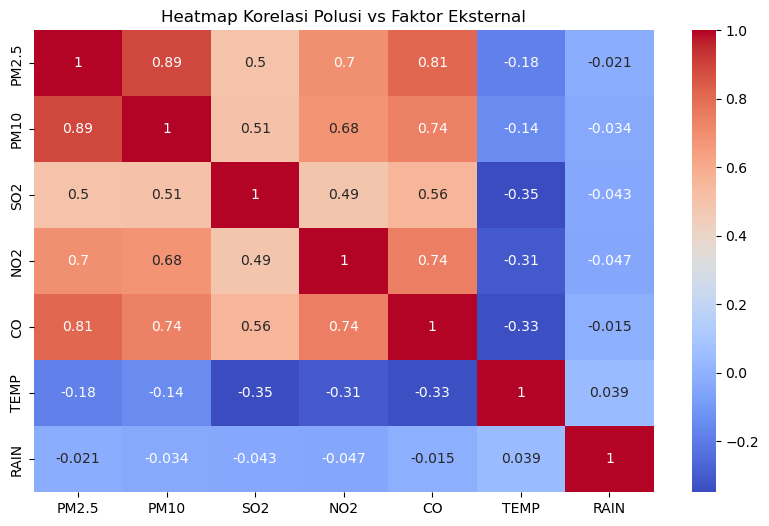

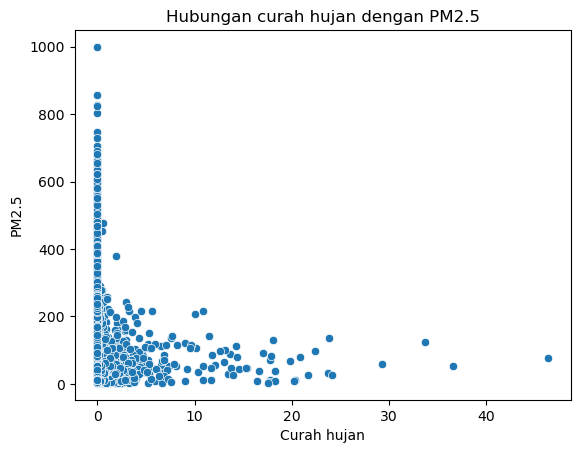

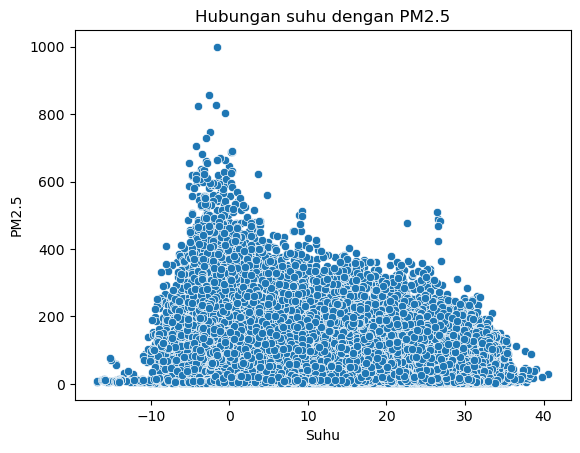

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'TEMP', 'RAIN']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Polusi vs Faktor Eksternal")
plt.show()

sns.scatterplot(x=df["RAIN"], y=df["PM2.5"])
plt.title("Hubungan curah hujan dengan PM2.5")
plt.xlabel("Curah hujan")
plt.ylabel("PM2.5")
plt.show()

sns.scatterplot(x=df["TEMP"], y=df["PM2.5"])
plt.title("Hubungan suhu dengan PM2.5")
plt.xlabel("Suhu")
plt.ylabel("PM2.5")
plt.show()


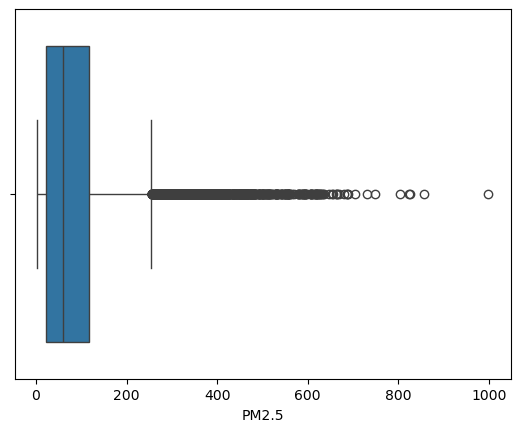

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,7303.0,84.028276,74.909646,3.0,26.0,64.0,119.0,510.0
2014,8551.0,89.077090,84.261374,3.0,26.0,67.0,125.0,704.0
2015,8538.0,84.714430,91.301623,3.0,21.0,56.0,112.0,690.0
2016,8588.0,78.542035,81.792114,3.0,20.0,55.0,106.0,999.0
2017,1388.0,107.306916,127.499515,3.0,13.0,60.0,158.0,823.0


In [57]:
sns.boxplot(x=df['PM2.5'])
plt.show()

df.groupby('year')['PM2.5'].describe()


Insight :
* Tidak ada hubungan yang kuat antara outliners pada polusi dengan faktor eksternal. Sehingga perlu dilakukan tindakan pada outliners tersebut.


### Cleaning Data

Sebelum melakukan Cleaning data, saya ingin mengubah beberapa heading column menjadi bahasa yang lebih mudah dimengerti. Sehingga dapat mempermudah dalam proses selanjutnya

In [58]:
df = df.rename(columns={
	"year": "Year",
	"month": "Month",
	"day": "Day",
	"hour": "Hour",
	"wd": "Wind_Direction",
	"WSPM": "Wind_Speed",
	"station": "Station"
})

df.head()

,No,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,Wind_Direction,Wind_Speed,Station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


Kemudian saya ingin membuat sebuah kolom baru berupa "Date"

Mengecek Tipe data pada dataset

In [59]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour"]])

In [60]:
df.dtypes

No                         int64
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
PM2.5                    float64
PM10                     float64
SO2                      float64
NO2                      float64
CO                       float64
O3                       float64
TEMP                     float64
PRES                     float64
DEWP                     float64
RAIN                     float64
Wind_Direction            object
Wind_Speed               float64
Station                   object
Date              datetime64[ns]
dtype: object

Melakukan pemeriksaan terhadap tipe data pada dataframe.
Insight :
* Terdapat beberapa Column yang memiliki tipe data yang tidak sesuai dan  harus diubah, yaitu Wind_Direction menjadi tipe data categories. 

In [61]:
df['Wind_Direction'] = df['Wind_Direction'].astype('category')

df.dtypes

No                         int64
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
PM2.5                    float64
PM10                     float64
SO2                      float64
NO2                      float64
CO                       float64
O3                       float64
TEMP                     float64
PRES                     float64
DEWP                     float64
RAIN                     float64
Wind_Direction          category
Wind_Speed               float64
Station                   object
Date              datetime64[ns]
dtype: object

In [62]:
df.isna().sum()

No                   0
Year                 0
Month                0
Day                  0
Hour                 0
PM2.5              696
PM10               484
SO2                669
NO2                754
CO                1297
O3                1078
TEMP                19
PRES                19
DEWP                19
RAIN                19
Wind_Direction      79
Wind_Speed          13
Station              0
Date                 0
dtype: int64

Melakukan pengecekan pada data null.

Dalam Cleaning data yang kosong(Null), saya akan membagi ke dalam beberapa cara, yaitu :
* Interpolation, untuk data PM2.5, PM10, SO2, NO2, CO, dan O3.
* Imputation mean, untuk data TEMP, PRES, DEWP, RAIN, dan WSPM. 
* Imputation mode, untuk data wd.

In [63]:
interpolation_data = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
imputation_mean = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'Wind_Speed']
imputation_mode = ['Wind_Direction']


df[interpolation_data] = df[interpolation_data].interpolate(method='linear')

df[imputation_mean] = df[imputation_mean].fillna(df[imputation_mean].mean())

for col in imputation_mode:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

No                0
Year              0
Month             0
Day               0
Hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
PRES              0
DEWP              0
RAIN              0
Wind_Direction    0
Wind_Speed        0
Station           0
Date              0
dtype: int64


Selanjutnya adalah tindakan dalam mengatasi Outliners. Tindakan yang saya pilih untuk melakukan Outliners adalah dengan konsep Imputation.

before/n               PM2.5          PM10           SO2           NO2            CO
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000
mean      85.067548    112.505795     17.363354     55.495402   1373.618569
std       85.999698     98.132120     24.171627     35.833026   1228.161525
min        3.000000      2.000000      0.285600      2.000000    100.000000
25%       23.000000     39.000000      3.000000     28.000000    600.000000
50%       60.000000     91.000000      8.000000     49.000000   1000.000000
75%      116.000000    154.000000     21.000000     77.000000   1700.000000
max      999.000000    961.000000    411.000000    251.000000   9800.000000

after
               PM2.5          PM10           SO2           NO2            CO
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000
mean      80.570754    108.597986     14.491975     55.145565   1272.124317
std       70.923979     84.504821     15.242220     34.711406    898.96

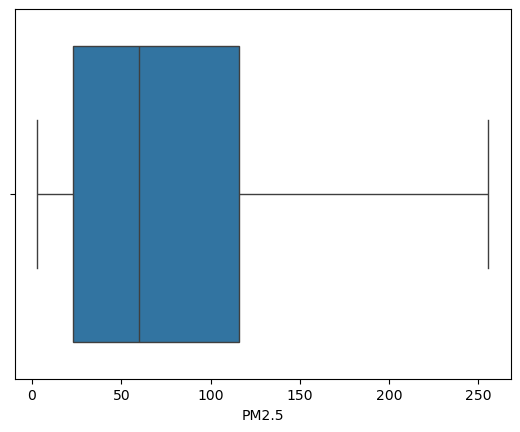

In [64]:
print('before/n', df[columns_to_check].describe())

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    condition_lower_than = df[col] < lower_bound
    condition_greater_than = df[col] > upper_bound

    df[col] = df[col].mask(condition_lower_than, lower_bound)
    df[col] = df[col].mask(condition_greater_than, upper_bound)

print('\nafter\n', df[columns_to_check].describe())

sns.boxplot(x=df['PM2.5'])
plt.show()


Insight :
Dari beberapa hasil di atas, beberapa masalah data telah berhasil dibersihkan. seperti :
* Mengatasi data yang null dengan beberapa ketentuan.
* Memperbaiki data yang outliners.

## Exploratory Data Analysis (EDA)

### Explore ...

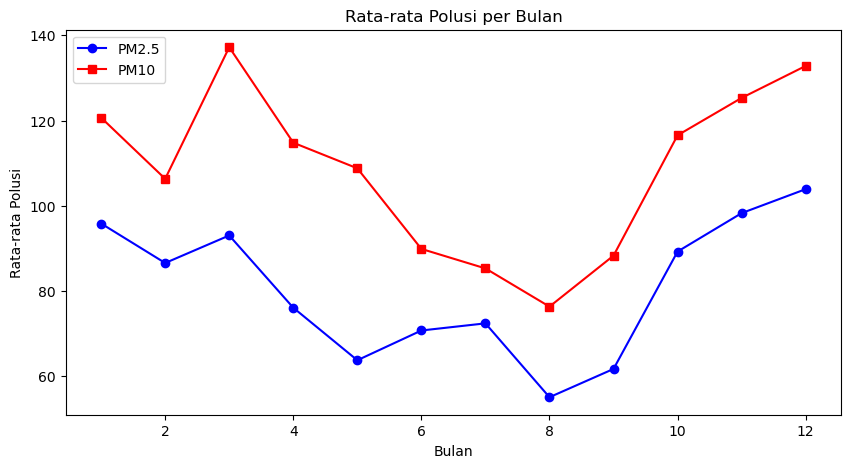

In [66]:
monthly_polution_data = df.groupby(by='Month').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    })

plt.figure(figsize=(10,5))
plt.plot(monthly_polution_data.index, monthly_polution_data['PM2.5'], marker='o', label='PM2.5', color='blue')
plt.plot(monthly_polution_data.index, monthly_polution_data['PM10'], marker='s', label='PM10', color='red')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Bulan')
plt.legend()
plt.show()

Kode ini menganalisis rata-rata polusi bulanan dengan mengelompokkan data berdasarkan bulan dan menghitung rata-rata nilai PM2.5 serta PM10.

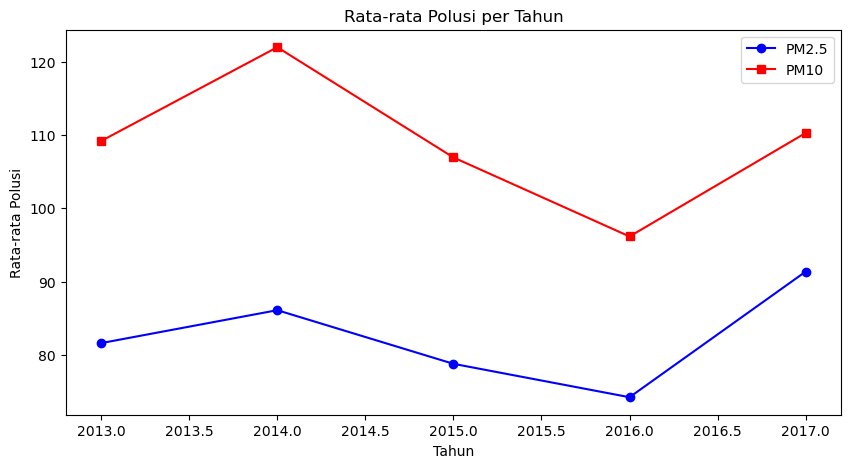

In [67]:
yearly_polution_data = df.groupby(by='Year').agg({
	'PM2.5': 'mean',
	'PM10': 'mean',
})

plt.figure(figsize=(10,5))
plt.plot(yearly_polution_data.index, yearly_polution_data['PM2.5'], marker='o', label='PM2.5', color='blue')
plt.plot(yearly_polution_data.index, yearly_polution_data['PM10'], marker='s', label='PM10', color='red')

plt.xlabel('Tahun')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Tahun')
plt.legend()
plt.show()

Kode ini bertujuan untuk menganalisis tren polusi udara tahunan dengan mengelompokkan data berdasarkan tahun dan menghitung rata-rata nilai PM2.5 serta PM10.

Korelasi :            PM2.5      PM10      RAIN      DEWP
PM2.5  1.000000  0.923333  0.253465  0.631583
PM10   0.923333  1.000000  0.174796  0.606506
RAIN   0.253465  0.174796  1.000000  0.579457
DEWP   0.631583  0.606506  0.579457  1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_10324\1739669403.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rainy_day_data = df[df['Year'] == 2013][df['Month'] == 3][df['Day'] == 19]
C:\Users\USER\AppData\Local\Temp\ipykernel_10324\1739669403.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rainy_day_data = df[df['Year'] == 2013][df['Month'] == 3][df['Day'] == 19]


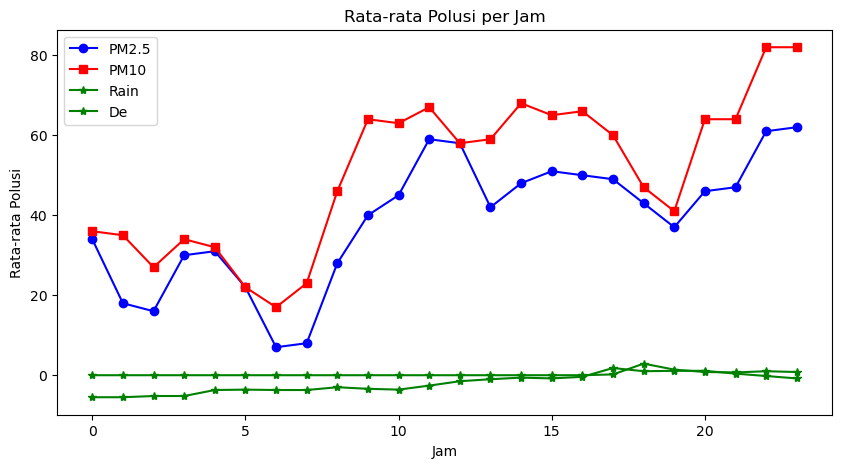

Hour
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.2
18    2.9
19    1.4
20    0.8
21    0.7
22    1.0
23    0.8
Name: RAIN, dtype: float64
Hour
0    -5.5
1    -5.5
2    -5.2
3    -5.2
4    -3.7
5    -3.6
6    -3.7
7    -3.7
8    -3.0
9    -3.4
10   -3.6
11   -2.6
12   -1.5
13   -1.0
14   -0.6
15   -0.8
16   -0.4
17    1.8
18    1.0
19    1.1
20    1.1
21    0.4
22   -0.2
23   -0.8
Name: DEWP, dtype: float64


In [ ]:
rainy_day_data = df[df['Year'] == 2013][df['Month'] == 3][df['Day'] == 19]
polution_data = rainy_day_data.groupby(by='Hour').agg({
	'PM2.5': 'mean',
	'PM10': 'mean',
	'RAIN': 'mean',
	'DEWP': 'mean'
})

print('Korelasi : ',polution_data.corr())

plt.figure(figsize=(10,5))
plt.plot(polution_data.index, polution_data['PM2.5'], marker='o', label='PM2.5', color='blue')
plt.plot(polution_data.index, polution_data['PM10'], marker='s', label='PM10', color='red')
plt.plot(polution_data.index, polution_data['RAIN'], marker='*', label='Rain', color='green')
plt.plot(polution_data.index, polution_data['DEWP'], marker='*', label='De', color='green')

plt.xlabel('Jam')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Jam')
plt.legend()
plt.show()

print(polution_data.RAIN)
print(polution_data.DEWP)

Kode ini menganalisis data polusi udara pada hari tertentu, yaitu 19 Maret 2013, dengan melihat pola perubahan polusi (PM2.5 dan PM10) serta faktor lingkungan seperti curah hujan (RAIN) dan titik embun (DEWP) berdasarkan jam.

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'DEWP'}>]], dtype=object)

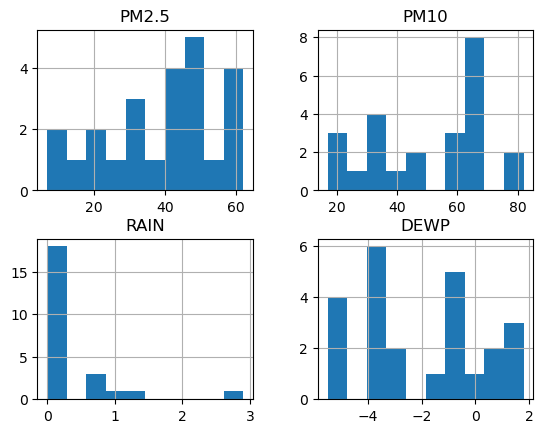

In [69]:
polution_data.hist()

Kode polution_data.hist() digunakan untuk membuat histogram dari setiap kolom dalam dataset polution_data.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara hujan (RAIN), suhu udara (TEMP) dan kelembapan udara (DEWP) terhadap konsentrasi polutan PM2.5 dan PM10?

C:\Users\USER\AppData\Local\Temp\ipykernel_10324\2107765344.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dummy_data = df[df['Year'] == 2013][df['Month'] == 3][df['Day'] == 19]
C:\Users\USER\AppData\Local\Temp\ipykernel_10324\2107765344.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dummy_data = df[df['Year'] == 2013][df['Month'] == 3][df['Day'] == 19]


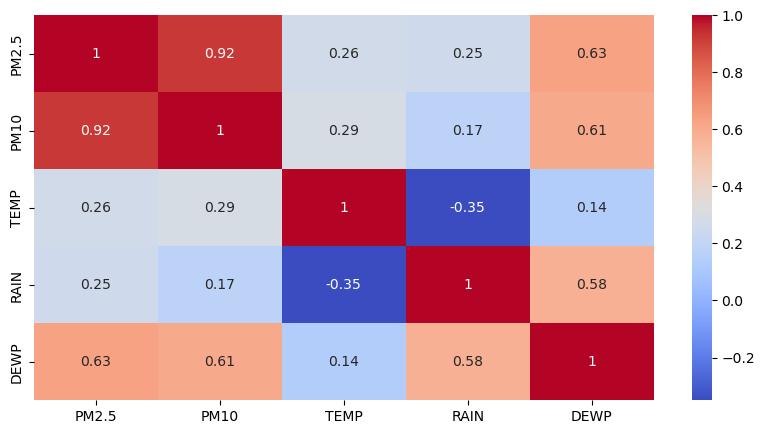

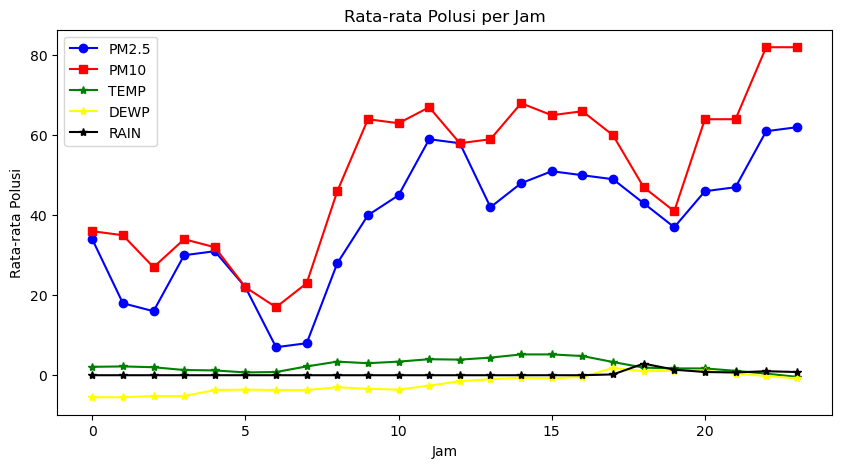

In [70]:
dummy_data = df[df['Year'] == 2013][df['Month'] == 3][df['Day'] == 19]
question_1_data = dummy_data.groupby(by='Hour').agg({
	'PM2.5': 'mean',
	'PM10': 'mean',
	'TEMP': 'mean',
	'RAIN': 'mean',
	'DEWP': 'mean'
})

plt.figure(figsize=(10,5))
sns.heatmap(question_1_data.corr(), annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(question_1_data.index, question_1_data['PM2.5'], marker='o', label='PM2.5', color='blue')
plt.plot(question_1_data.index, question_1_data['PM10'], marker='s', label='PM10', color='red')
plt.plot(question_1_data.index, question_1_data['TEMP'], marker='*', label='TEMP', color='green')
plt.plot(question_1_data.index, question_1_data['DEWP'], marker='*', label='DEWP', color='yellow')
plt.plot(question_1_data.index, question_1_data['RAIN'], marker='*', label='RAIN', color='black')

plt.xlabel('Jam')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Jam')
plt.legend()
plt.show()

Insight : 
1. Berdasarkan Korelasi Heatmap
	* PM2.5 dan PM10 memiliki korelasi sangat tinggi (0.92).
	* Hujan memiliki korelasi positif dengan PM2.5 (9.25) dan PM10 (0.17), tetapi kecil. Menunjukan bahwa hujan tidak secara signifikan mengurangi polusi.
	* DEWP memiliki korelasi sedang dengan PM2.5 (0.63) dan PM10 (0.61). Ini menunjukan bahwa kelembapan tinggi dapat membantu mempertahankan  partikel polutan di udara lebih lama.
	* TEMP memiliki korelasi rendah dengan PM2.5 (0.26) dan PM10 (0.29). ini mengindikasikan bahwa suhu tidak terlalu mempengarhui polutan.
2. Berdasarkan Grafik Garis
	* Suhu (TEMP) mengalami peningkatan disiang hari tetapi tidak menunjukan hubungan langsung dengan polutan.
	* Kelembapan (DEWP) relatif lebih tinggi di malam hari, yang mungkin membantu mempertahankan polutan di udara lebih lama.


### Pertanyaan 2: Bagaimana tren polusi udara (PM2.5 dan PM10) berkembang dari tahun ke tahun di wilayah ini?

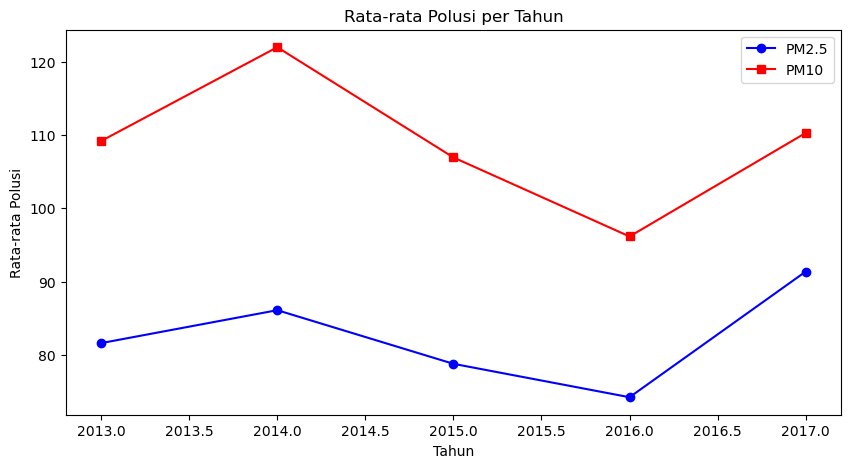

In [71]:
yearly_data = df.groupby(by='Year').agg({
	'PM2.5': 'mean',
	'PM10': 'mean',
})

plt.figure(figsize=(10,5))
plt.plot(yearly_data.index, yearly_data['PM2.5'], marker='o', label='PM2.5', color='blue')
plt.plot(yearly_data.index, yearly_data['PM10'], marker='s', label='PM10', color='red')

plt.xlabel('Tahun')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Tahun')
plt.legend()
plt.show()

**Insight:**

*	Polusi meningkat dari tahun 2013 ke 2014.
*	Polusi mengalami penurunan bertahap dari tahun 2014 hingga 2016.
*	Namun, pada tahun 2014 polusi kembali mengalami peningkatan yang signifikan.

### Pertanyaan 3: Apakah terdapat pola musiman dalam konsentrasi polutan udara?

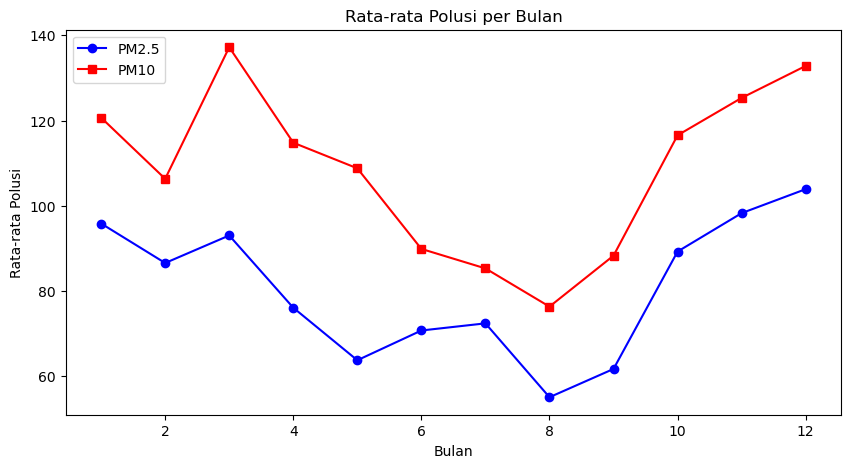

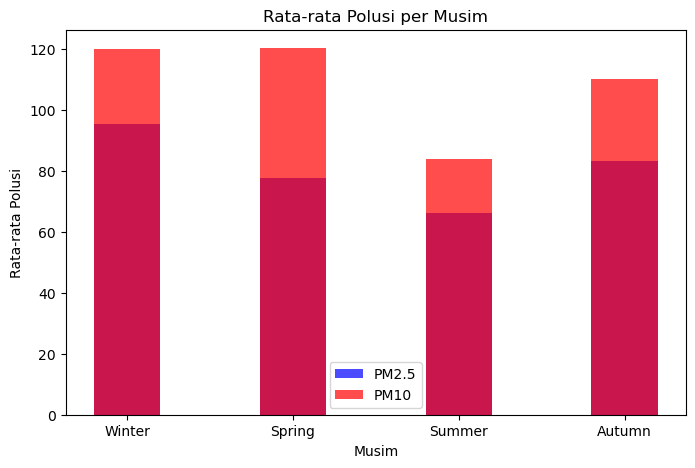

In [72]:
a_yearly_polution_data = df.groupby(by='Month').agg({
	'PM2.5': 'mean',
	'PM10': 'mean',
})

seasons = {
	'Winter': [12, 1, 2],
	'Spring': [3, 4, 5],
	'Summer': [6, 7, 8],
	'Autumn': [9, 10, 11]
}

seasonal_data = {season: a_yearly_polution_data.loc[months].mean() for season, months in seasons.items()}
seasonal_df = pd.DataFrame(seasonal_data).T

plt.figure(figsize=(10,5))
plt.plot(a_yearly_polution_data.index, a_yearly_polution_data['PM2.5'], marker='o', label='PM2.5', color='blue')
plt.plot(a_yearly_polution_data.index, a_yearly_polution_data['PM10'], marker='s', label='PM10', color='red')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Bulan')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
bar_width = 0.4
plt.bar(seasonal_df.index, seasonal_df['PM2.5'], width=bar_width, label='PM2.5', color='blue', alpha=0.7)
plt.bar(seasonal_df.index, seasonal_df['PM10'], width=bar_width, label='PM10', color='red', alpha=0.7, bottom=0)

plt.xlabel('Musim')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Musim')
plt.legend()
plt.show()

Insight :
* PM2.5 dan PM10 cenderung tinggi pada awal dan akhir tahun (Januari-Maret dan Oktober-Desember).
* Polusi cenderung lebih rendah pada pertengahan tahun (Juni-Agustus).
* Rata-rata Polusi tertinggi terjadi pada Winter dan Spring. 
* Summer memiliki tingkat polusi yang lebih rendah dibanding musim lainnya.


### Pertanyaan 4: Bagaimana pola polusi udara pada berbagai jam dalam sehari?

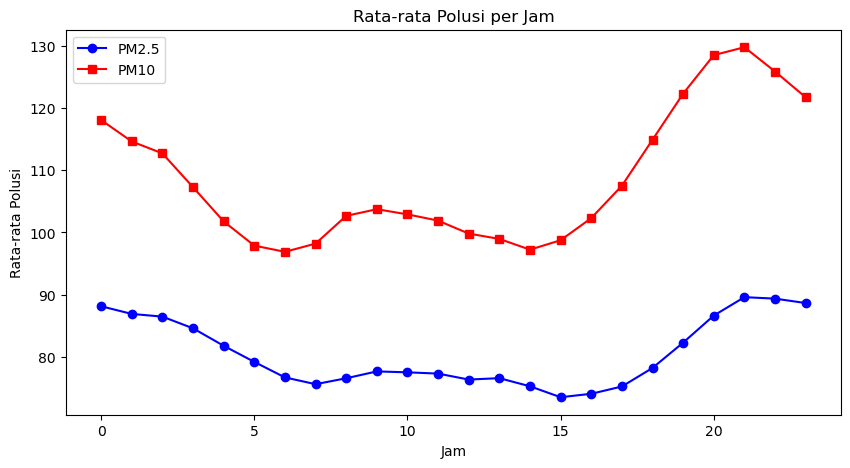

In [73]:
polution_data = df.groupby(by='Hour').agg({
	'PM2.5': 'mean',
	'PM10': 'mean',
})

plt.figure(figsize=(10,5))
plt.plot(polution_data.index, polution_data['PM2.5'], marker='o', label='PM2.5', color='blue')
plt.plot(polution_data.index, polution_data['PM10'], marker='s', label='PM10', color='red')

plt.xlabel('Jam')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Jam')
plt.legend()
plt.show()

Insight :
* Polusi lebih tinggi pada malam dan dini hari.
* Polusi relatif lebih rendah saat jam sibuk (pagi dan sore hari).

## Conclusion

- Kesimpulan pertanyaan 1
  - Hujan (RAIN) memiliki sedikit pengaruh terhadap polutan, tetapi tidak cukup kuat untuk membersihkan udara secara signifikan.
  - Kelembapan Udara (DEWP) memiliki hubungan sedang dengan polutan, yang menunjukan bahwa kelembapan tinggi membantu mempertahankan polutan lebih lama di udara.
  - Suhu Udara (TEMP) tidak memiliki pengaruh signigikan terhadap tingkat polusi.
  - Peningkatan polusi lebih cenderung dipengaruhi oleh aktivitas manusia dibandingkan faktor cuara seperti hujan atau suhu udara.
- Kesimpulan pertanyaan 2
  - Polusi udara (PM2.5 dan PM10) mencapai puncaknya pada tahun 2014.
  - Terjadi penurunan dari tahun 2014 hingga 2016.
  - Namun, kenaikan kembali pada 2017 menunjukan adanya faktor atau aktivitas yang meningkatkan polusi.
  - Pola ini menunjukkan bahwa meskipun sempat mengalami perbaikan, ada fkator yang menyebabkan kenaikan kembali pada tahun 2017.
- Kesimpulan pertanyaan 3
  - Ada pola musiman dalam polusi udara, dengan tingkat polusi yang lebih tinggi di musim Dingin dan Semi dan lebih rendah pada musim panas.
  - Hal ini bisa disebabkan oleh cuaca dingin yang memperburuk kualitas udara. Pada beberapa wilayah, musim dingin sering dikaitkan dengan peningkatan penggunaan pemanas berbasis bahan bakar fosil yang sangat berkontribusi pada tingginya polusi udara.
  - Musim dengan udara lebih stabil dan sedikit hujan cenderung memiliki polusi lebih tinggi.
- Kesimpulan pertanyaan 4
  - Polusi udara di wilayah ini lebih tinggi pada malam hingga dini hari, hal ini bisa dipengaruhi oleh fenomena atmosfer atau sumber polusi yang berbeda dari perkotaan pada umumnya.
  - Jam sibuk justru tidak menunjukan lonjakann polusi, yang berarti adanya faktor penyebaran polutan yang lebih baik pada siang hari.


In [74]:
# df.to_csv('cleaned_data.csv', index=False)